In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def add_metrics(title,mae,r2,ax,rmse,unit,test=True,fontsize=12):
    if test:
        ha = 'left'
        va = 'top'    
        lp = 0.04
        start = .98
    else:
        ha = 'left'
        va =  'bottom'
        lp = .38
        start = .16
    ax.text(lp, start, title, horizontalalignment=ha,verticalalignment=va,transform = ax.transAxes, 
            fontsize=fontsize)
    ax.text(lp, start, "_____________", horizontalalignment=ha,verticalalignment=va,transform = ax.transAxes,
           fontsize=fontsize)
    ax.text(lp, start-.07, str("R"+r"$^2$: "+f"   {r2:.2f}"), horizontalalignment=ha,verticalalignment=va,transform = ax.transAxes,
           fontsize=fontsize)
    ax.text(lp, start-.15, str(f"MAE: {mae:.2f} {unit}"), horizontalalignment=ha,verticalalignment=va,transform = ax.transAxes,
           fontsize=fontsize)
    ax.text(lp, start-.22, str(f"RMSE: {rmse:.2f} {unit}"), horizontalalignment=ha,verticalalignment=va,transform = ax.transAxes,
           fontsize=fontsize)
    
def cal_mae_rmse_r2(dft_val,pred):
    mae = mean_absolute_error(dft_val,pred)
    rmse = mean_squared_error(dft_val,pred,squared=False)
    r2 = r2_score(dft_val,pred)
    return mae, rmse, r2

In [3]:
root = '../test_preds/'
CSO_df = pd.read_json(root+'CSO.json')
PH_inter_df = pd.read_json(root+'CPD.json')
PH_fine_df = pd.read_json(root+'FPD.json')

In [4]:
PH_inter_df.dropna(inplace=True)
PH_fine_df.dropna(inplace=True)

In [5]:
len(CSO_df), len(PH_inter_df), len(PH_fine_df)

(824, 806, 806)

In [6]:
idx_train = np.loadtxt('../indices/idx_train_full.txt')
idx_test = np.loadtxt('../indices/idx_test_full.txt')

len(idx_train), len(idx_test)

(651, 173)

In [7]:
CSO_idx_train = CSO_df.loc[CSO_df.index.isin(idx_train)].index
PH_inter_idx_train = PH_inter_df.loc[PH_inter_df.index.isin(idx_train)].index
PH_fine_idx_train = PH_fine_df.loc[PH_fine_df.index.isin(idx_train)].index

len(CSO_idx_train), len(PH_inter_idx_train), len(PH_fine_idx_train)

(651, 636, 636)

In [8]:
CSO_idx_test = CSO_df.loc[CSO_df.index.isin(idx_test)].index
PH_inter_idx_test = PH_inter_df.loc[PH_inter_df.index.isin(idx_test)].index
PH_fine_idx_test = PH_fine_df.loc[PH_fine_df.index.isin(idx_test)].index
len(CSO_idx_test), len(PH_inter_idx_test), len(PH_fine_idx_test)

(173, 170, 170)

In [9]:
def cal_tc_pred(df,mu=0.09):
    lamb = df.lamb_pred
    omega_log = df.wlog_pred
    frac = -1.04*(1+lamb)/(lamb-mu*(1+0.62*lamb))
    return (omega_log/1.2)*np.exp(frac)    

def cal_tc_ad_pred(df,mu=0.1):
    lamb = df.lamb_pred
    wlog = df.wlog_pred
    w2 = df.wlog_pred
    tc = df.Tc_pred
    f1 = (1+(lamb/(2.46*(1+3.8*mu)))**1.5)**(1/3)
    f2 = 1+((lamb**2)*((w2/wlog)-1))/(lamb**2+(1.82*(1+6.3*mu)*(w2/wlog))**2)
    return f1*f2*tc

def cal_tc_target(df,mu=0.09):
    lamb = df.lamb_target
    omega_log = df.wlog_target
    frac = -1.04*(1+lamb)/(lamb-mu*(1+0.62*lamb))
    return (omega_log/1.2)*np.exp(frac)    

def cal_tc_ad_target(df,mu=0.1):
    lamb = df.lamb_target
    wlog = df.wlog_target
    w2 = df.wlog_target
    tc = df.Tc_target
    f1 = (1+(lamb/(2.46*(1+3.8*mu)))**1.5)**(1/3)
    f2 = 1+((lamb**2)*((w2/wlog)-1))/(lamb**2+(1.82*(1+6.3*mu)*(w2/wlog))**2)
    return f1*f2*tc

In [10]:
CSO_df['Tc_pred'] = CSO_df.apply(cal_tc_pred,axis = 1)
CSO_df['Tc_ad_pred'] = CSO_df.apply(cal_tc_ad_pred,axis = 1)
CSO_df['Tc_target'] = CSO_df.apply(cal_tc_target,axis = 1)
CSO_df['Tc_ad_target'] = CSO_df.apply(cal_tc_ad_target,axis = 1)

PH_fine_df['Tc_pred'] = PH_fine_df.apply(cal_tc_pred,axis = 1)
PH_fine_df['Tc_ad_pred'] = PH_fine_df.apply(cal_tc_ad_pred,axis = 1)
PH_fine_df['Tc_target'] = PH_fine_df.apply(cal_tc_target,axis = 1)
PH_fine_df['Tc_ad_target'] = PH_fine_df.apply(cal_tc_ad_target,axis = 1)

PH_inter_df['Tc_pred'] = PH_inter_df.apply(cal_tc_pred,axis = 1)
PH_inter_df['Tc_ad_pred'] = PH_inter_df.apply(cal_tc_ad_pred,axis = 1)
PH_inter_df['Tc_target'] = PH_inter_df.apply(cal_tc_target,axis = 1)
PH_inter_df['Tc_ad_target'] = PH_inter_df.apply(cal_tc_ad_target,axis = 1)

/scratch/local/41450440/ipykernel_4131662/946073641.py:5: RuntimeWarning: overflow encountered in exp
  return (omega_log/1.2)*np.exp(frac)


In [11]:
prop = ['lamb','wlog','w2']
models = [CSO_df, PH_inter_df, PH_fine_df]
loc_id = [CSO_idx_test, PH_inter_idx_test, PH_fine_idx_test]
color = ['C0','C5','C8']
units = ['','K','K']

/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecat

Text(0.5, 0, 'Target')

<Figure size 640x480 with 0 Axes>

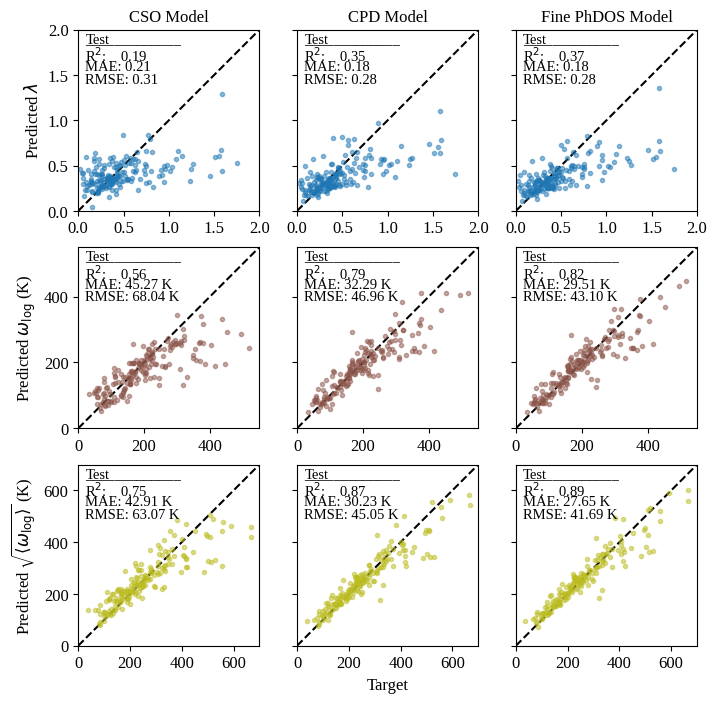

In [12]:
fontsize = 12

plt.clf()
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = 'Liberation Serif'#"Times New Roman"

plt.subplots_adjust(left=0.05,bottom=0.07,right=0.99,top=0.99)
fig, axs = plt.subplots(3,3,figsize=(8,8))

for i in range(3):
    for j in range(3):
        if i==0:
            lim = (0,2)
            ticks = [0,0.5,1.0,1.5,2.0]
            
        if i==1:
            lim = (0,550)
            ticks = np.arange(0,600,200)
        if i==2:
            lim = (0,700)
            ticks = np.arange(0,800,200)
        
        axs[i][j].scatter(models[j].loc[loc_id[j]][prop[i]+'_target'], models[j].loc[loc_id[j]][prop[i]+'_pred'],
                         marker='.',color=color[i],alpha=0.5)
        
        axs[i][j].plot(lim,lim,'k--',zorder=0)
        axs[i][j].set_xlim(lim)
        axs[i][j].set_ylim(lim)
        axs[i][j].set_xticks(ticks)
        axs[i][j].set_yticks(ticks)
        axs[i][j].set_aspect('equal')
        
        if j >0:
            axs[i][j].set_yticklabels([])
        
    
        mae, rmse, r2 = cal_mae_rmse_r2(dft_val=models[j].loc[loc_id[j]][prop[i]+'_target'], 
                                        pred=models[j].loc[loc_id[j]][prop[i]+'_pred'])
        add_metrics(title='Test',mae=mae,r2=r2,
                    ax=axs[i][j],rmse=rmse,unit=units[i],test=True, fontsize=10.5)
        
axs[0][0].set_title('CSO Model', fontsize=fontsize)
axs[0][1].set_title('CPD Model', fontsize=fontsize)
axs[0][2].set_title('Fine PhDOS Model', fontsize=fontsize)
        
axs[0][0].set_ylabel(r'Predicted $\lambda$')
axs[1][0].set_ylabel(r'Predicted $\omega_{\text{log}}$ (K)')
axs[2][0].set_ylabel(r'Predicted $\sqrt{\langle\omega_{\text{log}}\rangle}$ (K)')

axs[2][1].set_xlabel('Target')
#plt.tight_layout()

In [13]:
conv = {}
for i in range(3):
    for j in range(3):
        conv[(i*3)+j] = {'i':i,'j':j}

In [14]:
def get_avg_diff(df):
    return (abs(df.lamb_pred-df.lamb_target) + abs(df.w2_pred-df.w2_target) + abs(df.wlog_pred-df.wlog_target))/3

In [15]:
def get_diff_lamb(df):
    return abs(df.lamb_pred-df.lamb_target)

def get_diff_w2(df):    
    return abs(df.w2_pred-df.w2_target)

def get_diff_wlog(df):
    return abs(df.wlog_pred-df.wlog_target)

In [16]:
CSO_df['diff_lamb'] = CSO_df.apply(get_diff_lamb,axis = 1)
CSO_df['diff_w2'] = CSO_df.apply(get_diff_w2,axis = 1)
CSO_df['diff_wlog'] = CSO_df.apply(get_diff_wlog,axis = 1)

PH_fine_df['diff_lamb'] = PH_fine_df.apply(get_diff_lamb,axis = 1)
PH_fine_df['diff_w2'] = PH_fine_df.apply(get_diff_w2,axis = 1)
PH_fine_df['diff_wlog'] = PH_fine_df.apply(get_diff_wlog,axis = 1)

PH_inter_df['diff_lamb'] = PH_inter_df.apply(get_diff_lamb,axis = 1)
PH_inter_df['diff_w2'] = PH_inter_df.apply(get_diff_w2,axis = 1)
PH_inter_df['diff_wlog'] = PH_inter_df.apply(get_diff_wlog,axis = 1)

In [17]:
min_lamb = CSO_df.diff_lamb.min()
min_w2 = CSO_df.diff_w2.min()
min_wlog = CSO_df.diff_wlog.min()

max_lamb = CSO_df.diff_lamb.max()
max_w2 = CSO_df.diff_w2.max()
max_wlog = CSO_df.diff_wlog.max()

In [18]:
def get_avg_diff(df):
    lamb = (df.diff_lamb - min_lamb)/(max_lamb-min_lamb)
    w2 = (df.diff_w2 - min_w2)/(max_w2-min_w2)
    wlog = (df.diff_wlog - min_wlog)/(max_wlog-min_wlog)
    return (lamb+w2+wlog)/3

def get_mape(df):
    lamb = abs((df.lamb_target-df.lamb_pred)/df.lamb_target)
    w2 = abs((df.w2_target-df.w2_pred)/df.w2_target)
    wlog = abs((df.wlog_target-df.wlog_pred)/df.wlog_target)
    return (lamb+w2+wlog)/3

In [19]:
CSO_df['diffs'] = CSO_df.apply(get_avg_diff,axis = 1)
PH_fine_df['diffs'] = PH_fine_df.apply(get_avg_diff,axis = 1)
PH_inter_df['diffs'] = PH_inter_df.apply(get_avg_diff,axis = 1)

In [20]:
CSO_df['mape'] = CSO_df.apply(get_mape,axis = 1)
PH_fine_df['mape'] = PH_fine_df.apply(get_mape,axis = 1)
PH_inter_df['mape'] = PH_inter_df.apply(get_mape,axis = 1)

In [21]:
CSO_df.sort_values(by='diffs',inplace=True,ascending=True)

In [22]:
Freq_final =np.arange(0.25,101,2)


In [23]:
idx_worst = [811,759,814,717,812,807]
idx_worst = [79,755,549,71,766,729]

In [24]:
def add_metrics(title,mae,r2,ax,rmse,unit,test=True,fontsize=12):
    if test:
        ha = 'left'
        va = 'top'    
        lp = 0.04
        start = .98
    else:
        ha = 'left'
        va =  'bottom'
        lp = .38
        start = .16
    ax.text(lp, start, title, horizontalalignment=ha,verticalalignment=va,transform = ax.transAxes, 
            fontsize=fontsize)
    ax.text(lp, start, "_____________", horizontalalignment=ha,verticalalignment=va,transform = ax.transAxes,
           fontsize=fontsize)
    ax.text(lp, start-.07, str("R"+r"$^2$: "+f"   {r2:.2f}"), horizontalalignment=ha,verticalalignment=va,transform = ax.transAxes,
           fontsize=fontsize)
    ax.text(lp, start-.173, str(f"MAE: {mae:.2f} {unit}"), horizontalalignment=ha,verticalalignment=va,transform = ax.transAxes,
           fontsize=fontsize)
    ax.text(lp, start-.255, str(f"RMSE: {rmse:.2f} {unit}"), horizontalalignment=ha,verticalalignment=va,transform = ax.transAxes,
           fontsize=fontsize)

In [25]:
def convert_to_subscript(s):
    """
    Converts numbers in a string to subscript format for use in matplotlib axes title.
    
    Args:
    s (str): The input string with numbers.

    Returns:
    str: The string with numbers converted to subscript.
    """
    # Create a mapping for subscript characters
    subscript_map = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

    # Translate the string using the subscript map
    return s.translate(subscript_map)

def convert_to_subscript(s):
    """
    Converts numbers in a string to LaTeX subscript format.
    
    Args:
    s (str): The input string with numbers.

    Returns:
    str: The string in LaTeX format with numbers as subscripts.
    """
    result = ""

    # Iterate through each character in the string
    for char in s:
        # If the character is a digit, add it as a subscript
        if char.isdigit():
            result += "$\mathrm{_{" + char + "}}$"
        else:
            # If not a digit, just add the character as it is
            result += char

    return  result

/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecat

<Figure size 640x480 with 0 Axes>

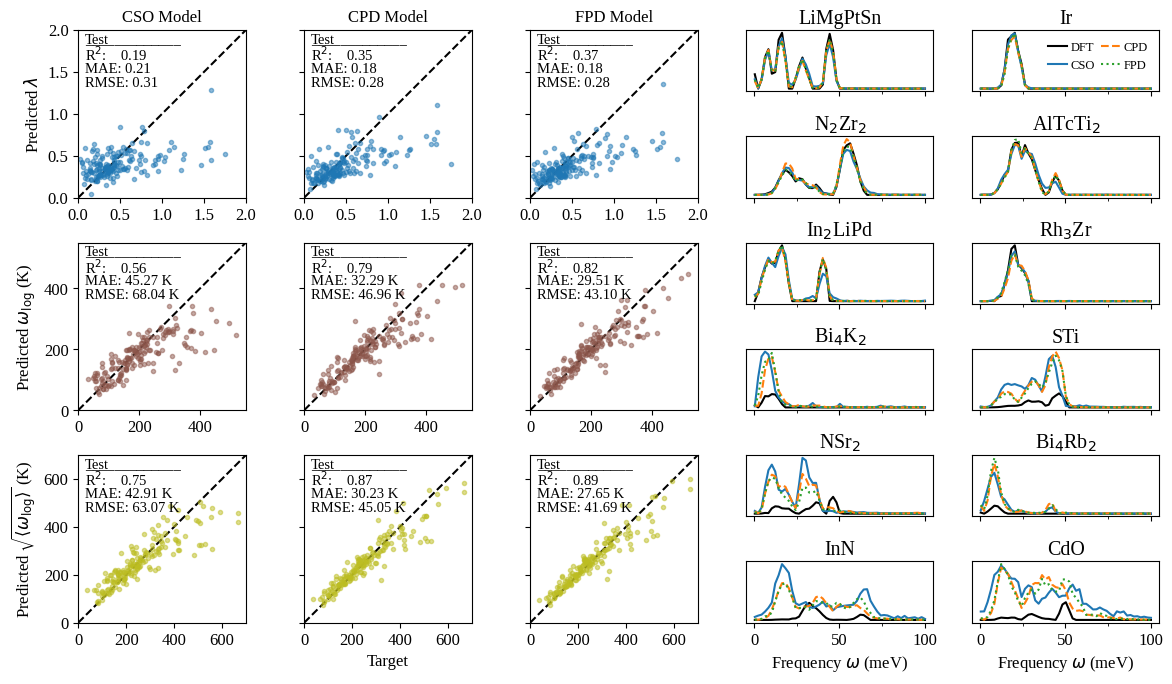

In [26]:
fontsize = 12

plt.clf()
plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "Times New Roman"

plt.subplots_adjust(left=0.05,bottom=0.07,right=0.99,top=0.99)

fig, axs = plt.subplot_mosaic([[0,1,2,'b0','b1'],[0,1,2,'b2','b3'],
                               [3,4,5,'b4','b5'],[3,4,5,'w0','w1'],
                              [6,7,8,'w2','w3'],[6,7,8,'w4','w5']],figsize=(12,7))

for label, ax in axs.items():
    if label in range(9):
        i = conv[label]['i']
        j = conv[label]['j']
        if i==0:
            lim = (0,2)
            ticks = [0,0.5,1.0,1.5,2.0]

        if i==1:
            lim = (0,550)
            ticks = np.arange(0,600,200)
        if i==2:
            lim = (0,700)
            ticks = np.arange(0,800,200)

        ax.scatter(models[j].loc[loc_id[j]][prop[i]+'_target'], models[j].loc[loc_id[j]][prop[i]+'_pred'],
                         marker='.',color=color[i],alpha=0.5)

        ax.plot(lim,lim,'k--',zorder=0)
        ax.set_xlim(lim)
        ax.set_ylim(lim)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.set_aspect('equal')

        if j >0:
            ax.set_yticklabels([])


        mae, rmse, r2 = cal_mae_rmse_r2(dft_val=models[j].loc[loc_id[j]][prop[i]+'_target'], 
                                        pred=models[j].loc[loc_id[j]][prop[i]+'_pred'])
        add_metrics(title='Test',mae=mae,r2=r2,
                    ax=ax,rmse=rmse,unit=units[i],test=True, fontsize=10.5)
        
axs[0].set_title('CSO Model', fontsize=fontsize)
axs[1].set_title('CPD Model', fontsize=fontsize)
axs[2].set_title('FPD Model', fontsize=fontsize)
        
axs[0].set_ylabel(r'Predicted $\lambda$')
axs[3].set_ylabel(r'Predicted $\omega_{\text{log}}$ (K)')
axs[6].set_ylabel(r'Predicted $\sqrt{\langle\omega_{\text{log}}\rangle}$ (K)')

axs[7].set_xlabel('Target')

y=.97
for i,idx in enumerate(CSO_df.head(6).index):
    axs[f'b{i}'].plot(Freq_final,CSO_df.loc[idx].target,'k',label='DFT')

    axs[f'b{i}'].plot(Freq_final,CSO_df.loc[idx].pred_avg,label='CSO')
    axs[f'b{i}'].plot(Freq_final,PH_inter_df.loc[idx].pred_avg,'--',label='CPD')
    axs[f'b{i}'].plot(Freq_final,PH_fine_df.loc[idx].pred_avg,':',label='FPD')
    axs[f'b{i}'].set_title(convert_to_subscript(CSO_df.loc[idx].comp),y=y)
for i,idx in enumerate(idx_worst):
    
    axs[f'w{i}'].plot(Freq_final,CSO_df.loc[idx].target,'k')

    axs[f'w{i}'].plot(Freq_final,CSO_df.loc[idx].pred_avg)
    axs[f'w{i}'].plot(Freq_final,PH_inter_df.loc[idx].pred_avg,'--')
    axs[f'w{i}'].plot(Freq_final,PH_fine_df.loc[idx].pred_avg,':')
    axs[f'w{i}'].set_title(convert_to_subscript(CSO_df.loc[idx].comp),y=y)
for c in ['w','b']:   
    for i in range(6):
        axs[f'{c}{i}'].set_xticks([0,50,100])
        axs[f'{c}{i}'].set_xticks([25,75],minor=True)
        axs[f'{c}{i}'].set_yticks([])
        axs[f'{c}{i}'].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False) 
    
    
axs[f'w5'].set_xlabel('Frequency '+r'$\omega$ (meV)')    
axs[f'w5'].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
axs[f'w4'].set_xlabel('Frequency '+r'$\omega$ (meV)')    
axs[f'w4'].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

axs['b1'].legend(ncols=2,fontsize=9,handletextpad=.3,columnspacing=.5,handlelength=1.5,frameon=False)
plt.tight_layout()

In [27]:
from pymatgen.core import Element

In [28]:
species = sorted(list(set(CSO_df['species'].sum())))

In [29]:
atomic_number = [Element(sp).number for sp in species]
atomic_number, species = zip(*sorted(zip(atomic_number, species)))

In [30]:
cso_err = {}
cpd_err = {}
fpd_err = {}
for specie in species:
    cso_err[specie] = []
    cpd_err[specie] = []
    fpd_err[specie] = []
loc_id = [CSO_idx_test, PH_inter_idx_test, PH_fine_idx_test]
    
for index, entry in CSO_df.loc[CSO_idx_test].iterrows():
    err = entry['diffs']
#     err = entry['mape']
    for specie in entry['species']:
        cso_err[specie].append(err)    

for index, entry in PH_inter_df.loc[PH_inter_idx_test].iterrows():
    err = entry['diffs']
#     err = entry['mape']
    for specie in entry['species']:
        cpd_err[specie].append(err) 
        
for index, entry in PH_fine_df.loc[PH_fine_idx_test].iterrows():
    err = entry['diffs']
#     err = entry['mape']
    for specie in entry['species']:
        fpd_err[specie].append(err)         
        
for specie in species:
#     error_list = cso_err[specie]
    cso_err[specie] = np.mean(cso_err[specie])  
    cpd_err[specie] = np.mean(cpd_err[specie])        
    fpd_err[specie] = np.mean(fpd_err[specie])        

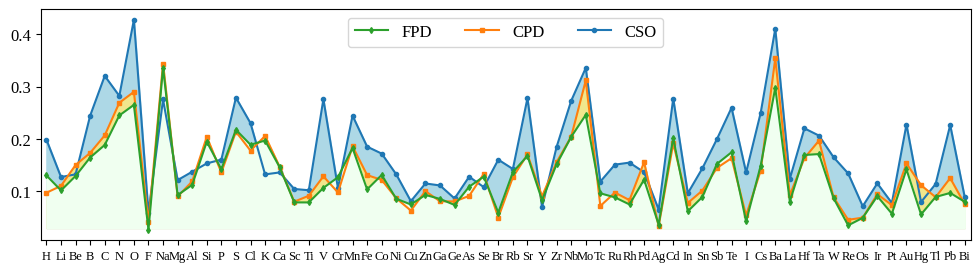

In [31]:
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(fpd_err.values(),'-d',c='C2',label='FPD',zorder=5,ms=3)
ax.plot(cpd_err.values(),'-s',c='C1',label='CPD',zorder=4,ms=3)
ax.plot(cso_err.values(),'-o',c='C0',label='CSO',zorder=3,ms=3)

ax.fill_between(range(len(cso_err)), cso_err.values(),0.03, color='lightblue',zorder=0)
ax.fill_between(range(len(cpd_err)), cpd_err.values(),0.03, color='khaki',zorder=1)
ax.fill_between(range(len(fpd_err)), fpd_err.values(),0.03, color='honeydew',zorder=2)

_ = ax.set_xticks(range(len(species)))
_ = ax.set_xticklabels(species)
ax.tick_params(axis='x', labelsize=9)

ax.set_xlim([-.4,len(species)-.6])
ax.legend(ncols = 3)

/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jasongibson/miniconda3/envs/e3nn/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecat

<Figure size 640x480 with 0 Axes>

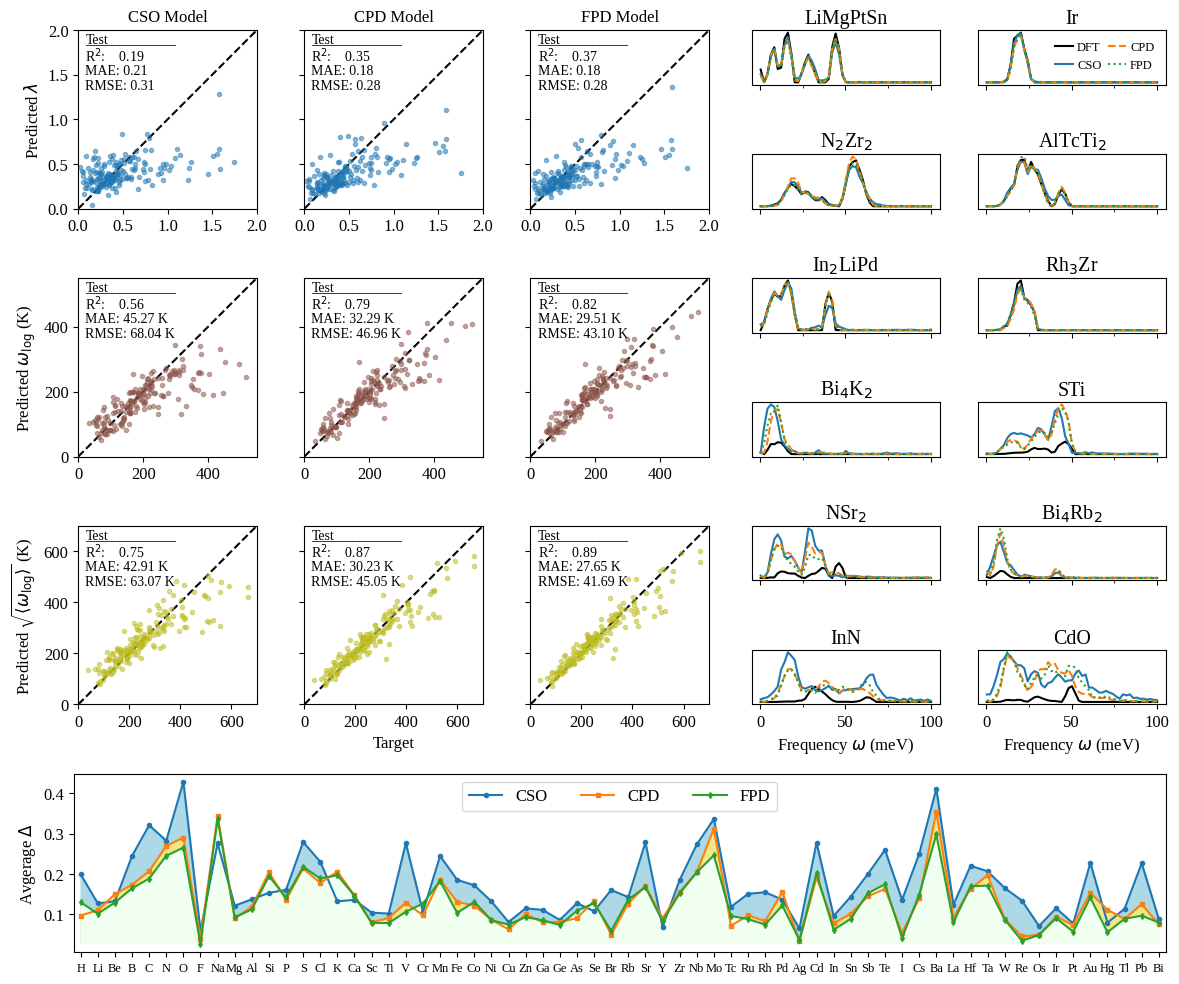

In [32]:
fontsize = 12

plt.clf()
plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "Times New Roman"

fig, axs = plt.subplot_mosaic([[0,1,2,'b0','b1'],[0,1,2,'b2','b3'],
                               [3,4,5,'b4','b5'],[3,4,5,'w0','w1'],
                              [6,7,8,'w2','w3'],[6,7,8,'w4','w5'],
                              ['err']*5,['err']*5],figsize=(12,10))
plt.tight_layout()

for label, ax in axs.items():
    if label in range(9):
        i = conv[label]['i']
        j = conv[label]['j']
        if i==0:
            lim = (0,2)
            ticks = [0,0.5,1.0,1.5,2.0]

        if i==1:
            lim = (0,550)
            ticks = np.arange(0,600,200)
        if i==2:
            lim = (0,700)
            ticks = np.arange(0,800,200)

        ax.scatter(models[j].loc[loc_id[j]][prop[i]+'_target'], models[j].loc[loc_id[j]][prop[i]+'_pred'],
                         marker='.',color=color[i],alpha=0.5)

        ax.plot(lim,lim,'k--',zorder=0)
        ax.set_xlim(lim)
        ax.set_ylim(lim)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.set_aspect('equal')

        if j >0:
            ax.set_yticklabels([])


        mae, rmse, r2 = cal_mae_rmse_r2(dft_val=models[j].loc[loc_id[j]][prop[i]+'_target'], 
                                        pred=models[j].loc[loc_id[j]][prop[i]+'_pred'])
        add_metrics(title='Test',mae=mae,r2=r2,
                    ax=ax,rmse=rmse,unit=units[i],test=True, fontsize=10)
        
axs[0].set_title('CSO Model', fontsize=fontsize)
axs[1].set_title('CPD Model', fontsize=fontsize)
axs[2].set_title('FPD Model', fontsize=fontsize)
        
axs[0].set_ylabel(r'Predicted $\lambda$')
axs[3].set_ylabel(r'Predicted $\omega_{\text{log}}$ (K)')
axs[6].set_ylabel(r'Predicted $\sqrt{\langle\omega_{\text{log}}\rangle}$ (K)')

axs[7].set_xlabel('Target')

y=.97
for i,idx in enumerate(CSO_df.head(6).index):
    axs[f'b{i}'].plot(Freq_final,CSO_df.loc[idx].target,'k',label='DFT')

    axs[f'b{i}'].plot(Freq_final,CSO_df.loc[idx].pred_avg,label='CSO')
    axs[f'b{i}'].plot(Freq_final,PH_inter_df.loc[idx].pred_avg,'--',label='CPD')
    axs[f'b{i}'].plot(Freq_final,PH_fine_df.loc[idx].pred_avg,':',label='FPD')
    axs[f'b{i}'].set_title(convert_to_subscript(CSO_df.loc[idx].comp),y=y)
for i,idx in enumerate(idx_worst):
    
    axs[f'w{i}'].plot(Freq_final,CSO_df.loc[idx].target,'k')

    axs[f'w{i}'].plot(Freq_final,CSO_df.loc[idx].pred_avg)
    axs[f'w{i}'].plot(Freq_final,PH_inter_df.loc[idx].pred_avg,'--')
    axs[f'w{i}'].plot(Freq_final,PH_fine_df.loc[idx].pred_avg,':')
    axs[f'w{i}'].set_title(convert_to_subscript(CSO_df.loc[idx].comp),y=y)
for c in ['w','b']:   
    for i in range(6):
        axs[f'{c}{i}'].set_xticks([0,50,100])
        axs[f'{c}{i}'].set_xticks([25,75],minor=True)
        axs[f'{c}{i}'].set_yticks([])
        axs[f'{c}{i}'].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False) 
    
    
axs[f'w5'].set_xlabel('Frequency '+r'$\omega$ (meV)')    
axs[f'w5'].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
axs[f'w4'].set_xlabel('Frequency '+r'$\omega$ (meV)')    
axs[f'w4'].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

axs['b1'].legend(ncols=2,fontsize=9,handletextpad=.3,columnspacing=.5,handlelength=1.5,frameon=False)

ax = axs['err']

ax.plot(cso_err.values(),'-o',c='C0',label='CSO',zorder=3,ms=3)
ax.plot(cpd_err.values(),'-s',c='C1',label='CPD',zorder=4,ms=3)
ax.plot(fpd_err.values(),'-d',c='C2',label='FPD',zorder=5,ms=3)

ax.fill_between(range(len(cso_err)), cso_err.values(),0.03, color='lightblue',zorder=0)
ax.fill_between(range(len(cpd_err)), cpd_err.values(),0.03, color='khaki',zorder=1)
ax.fill_between(range(len(fpd_err)), fpd_err.values(),0.03, color='honeydew',zorder=2)

_ = ax.set_xticks(range(len(species)))
_ = ax.set_xticklabels(species)
ax.tick_params(axis='x', labelsize=9)
ax.set_xlim([-.4,len(species)-.6])
ax.legend(loc=9,ncols = 3)
ax.set_ylabel('Avgerage '+r'$\Delta$')
plt.tight_layout()


$|\Delta\lambda| = |\lambda^{DFT}-\lambda^{ML}|$ 

$|\Delta\omega_{log}| = |\omega_{log}^{DFT}-\omega_{log}^{ML}|$ 

$|\Delta\sqrt{\omega_2}| = |\sqrt{\omega_2}^{DFT}-\sqrt{\omega_2}^{ML}|$ 

$|\Delta X|' = \frac{|\Delta X| - |\Delta X|_{min}}{|\Delta X|_{max} - |\Delta X|_{min}}$

Average $\Delta = \frac{|\Delta\lambda|' + |\Delta\omega_{log}|' + |\Delta\sqrt{\omega_2}|'}{3}$

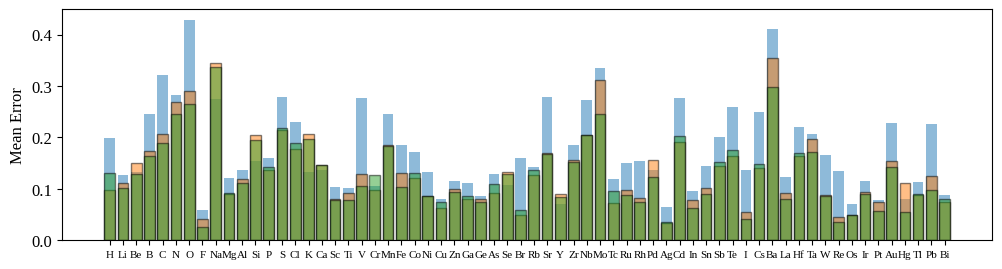

In [33]:
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.bar(*zip(*cso_err.items()),label='CSO',alpha=0.5,)
ax.bar(*zip(*cpd_err.items()),label='CSO',alpha=0.5, edgecolor='k')
ax.bar(*zip(*fpd_err.items()),label='CSO',alpha=0.5, edgecolor='k')

ax.set_ylabel('Mean Error')
ax.tick_params(axis='x', labelsize=8)